# Chp2. End-to-End Machine Learning Project
* 발표자: 이우진
* 발표일: 2017.09.23
------------------------

이 장에서는프로젝트를 진행합니다. 다음은 주요 단계입니다.

1. 큰 그림을 보십시오.

2. 데이터를 가져옵니다.

3. 데이터를 발견하고 시각화하여 인사이트를 얻습니다.

4. 기계 학습 알고리즘에 대한 데이터를 준비합니다.

5. 모델을 선택하고 훈련시킵니다.

6. 모델을 튜닝합니다.

7. 솔루션을 제시합니다.

8. 런치, 모니터 및 유지 보수하십시오.



## Working with Real Data

기계 학습에 대해 배우고있을 때 인위적인 데이터 세트뿐만 아니라 실제 데이터를 실제로 실험하는 것이 가장 좋습니다. 다행스럽게도 모든 종류의 도메인에 걸쳐 선택할 수있는 수천 개의 열린 데이터 세트가 있습니다. 다음은 데이터를 얻을 수있는 몇 가지 위치입니다.

• 널리 사용되는 개방형 데이터 리포지토리 :
 - UC Irvine Machine Learning Repository 
 - Kaggle 데이터 세트 
 - Amazon의 AWS 데이터 세트

• 메타 포털 (open data repositories) :

- http://dataportals.org/ 
- http://opendatamonitor.eu/ 
- http://quandl.com/

• 많은 인기있는 오픈 데이터 리포지토리가 나열된 다른 페이지 :

- Wikipedia의 기계 학습 데이터 세트 목록 
- Quora.com 질문 
- 데이터 세트 subreddit

이 장에서는 StatLib 저장소에서 캘리포니아 주택 가격 데이터 세트를 선택했습니다 (그림 2-1 참조). 이 데이터 세트는 1990 년 캘리포니아 센서스의 데이터를 기반으로 했습니다. 그것은 정확히 최근의 것은 아닙니다. 그러나 그것은 학습을 위한 많은 qualities을 가지고 있으므로 최근 데이터 인 것처럼 보겠습니다. 범주형 속성을 추가하고 강의 목적으로 몇 가지 feature를 제거했습니다.

<img src="ch2_1.png" style="width:700px" />

## Look at the Big Picture

Machine Learning Housing Corporation에 오신 것을 환영합니다! 수행해야 할 첫 번째 과제는 캘리포니아 인구 조사 데이터를 사용하여 캘리포니아 주거 가격 모델을 구축하는 것입니다. 이 데이터에는 캘리포니아의 각 블록 그룹에 대한 인구, 중간 소득, 주택 가격 중앙값 등과 같은 데이터들이 있습니다. 블록 그룹은 미국 인구 통계국이 샘플 데이터를 게시하는 가장 작은 지리적 단위입니다 (블록 그룹은 일반적으로 인구가 600-3,000 명입니다). 우리는 그걸 짧게 "구역"이라고 부를 것입니다.

모델은 이 데이터로부터 배워야하고 다른 모든 지표를 고려해 어느 지역의 주택 가격의 중간 값을 예측할 수 있어야합니다.

    당신이 잘 조직 된 데이터 과학자이기 때문에, 당신이해야 할 첫 번째 일은 당신의 Machine Learning 프로젝트 점검표를 꺼내는 것입니다. 부록 B에서 시작할 수 있습니다. 그것은 대부분의 기계 학습 프로젝트에 대해 합리적으로 잘 작동하지만, 어느정도 맞게 조정할 필요도 있습니다. 이 장에서는 많은 체크리스트 항목을 살펴 보겠지만, 설명이 필요하지 않거나 이후 장에서 논의 할 것이기 때문에 약간 건너 뛸 것입니다.


### Frame the Problem

상사에게 질문하는 첫 번째 질문은 비즈니스 목표가 정확히 무엇인지 입니다. 모델을 만드는 것이 최종 목표가 아닐 수도 있습니다. 회사가 이 모델을 어떻게 사용하고 이익을 얻을 것으로 기대합니까? 이는 문제의 틀을 정하는 방법, 선택할 알고리즘, 모델을 평가하는 데 사용할 성능 측정 방법 및 조정을 위해 얼마나 많은 노력을 기울여야하는지 판단하기 때문에 중요합니다.

상사는 모델의 산출물 (지구의 주택 가격 중앙값 예측치)이 다른 많은 데이터와 함께 다른 기계 학습 시스템 (그림 2-2 참조)에 공급 될 것이라고 대답합니다. 이 다운 스트림 시스템은 특정 지역에 투자 할 가치가 있는지 여부를 결정합니다. 이걸 정확히 아는 것은 수익에 직접적인 영향을 주기 때문에 중요합니다.

<img src="ch2_2.png" style="width:700px" />

#### Pipelines

    일련의 데이터 처리 구성 요소를 데이터 파이프라인 이라고 합니다. 파이프 라인은 기계 학습 시스템에서 매우 일반적입니다. 조작해야 할 데이터가 많고 적용 할 데이터 변환이 많기 때문입니다.

    일반적으로 구성 요소는 비동기적*으로 실행됩니다. 각 구성 요소는 많은 양의 데이터를 가져 와서 처리하고 결과를 다른 데이터 저장소에 저장 한 다음 나중에 파이프 라인의 다음 구성 요소가 이 데이터를 가져 와서 다른 아웃풋을 내보내는 식입니다. 각 구성 요소는 상당히 독립적입니다. 구성 요소 간의 인터페이스는 단순히 데이터 저장소입니다. 이를 통해 시스템을 매우 쉽게 파악할 수 있으며 (데이터 흐름 그래프를 사용하여) 여러 팀이 서로 다른 구성 요소에 집중할 수 있습니다. 또한 구성 요소가 고장 나면 다운 스트림 구성 요소가 끊어진 구성 요소의 마지막 출력을 사용하여 정상적으로 계속 실행될 수 있습니다 (적어도 잠시 동안). 이것은 아키텍처를 상당히 견고하게 만듭니다.

    반면에 적절한 모니터링이 구현되지 않으면 깨진 구성 요소가 잠시 동안 눈에 띄지 않을 수 있습니다. 데이터가 오래되고 전반적인 시스템 성능이 떨어집니다.
    
    *비동기적: 어떤 작업을 요청했을 때 그 작업이 종료될 때 까지 기다리지 않고 다른 작업을 하고 있다가, 요청했던 작업이 종료되면 그에 대한 추가 작업을 수행하는 방식

다음으로 물어볼 질문은 현재 솔루션이 어떤 것인지 확인하는 것 (있는 경우)입니다. 이는 문제 해결 방법에 대한 통찰뿐만 아니라 레퍼런스 퍼포먼스를 제공합니다. 귀하의 상사는 지구 주택 가격이 현재 전문가가 수동으로 추정하고 있다고 대답합니다: 팀이 지구에 대한 최신 정보를 수집하고 (주택 가격의 중앙값 제외), 복잡한 규칙을 사용하여 예상치를 산출합니다. 이것은 값 비싸고 시간이 많이 소요되며 정확도는높지 않습니다. 그들의 전형적인 에러율은 약 15%입니다.

이제 이 모든 정보를 통해 시스템 설계를 시작해야 합니다. 먼저, 문제를 정의해야 합니다. 지도, 비지도 혹은 강화학습인지? 분류 문제인지, 회귀 문제인지? batch 학습 해야할지, 실시간으로 학습해야할지?

여기서는 데이터에 라벨이 있기(각 사례는 기대되는 결과물, 즉 학군의 주택 가격의 중간 값이 주어짐)가 주어지기 때문에 아마 지도 학습을 써야 할 것입니다. 또한 값을 예측하라는 메시지가 표시되기 때문에 일반적인 회귀 작업이기도 합니다. 구체적으로 말하면, 시스템이 예측을 하기 위해 여러 가지 기능을 사용할 것이기 때문에 이것은 다변수 회귀 문제입니다 (이는 지구의 인구, 중간 소득 등을 사용합니다). 첫 번째 장에서는 일인당 GDP라는 한 가지 특성만으로 삶의 만족도를 예측 했으므로 단변수 회귀 문제였습니다. 마지막으로, 시스템에 지속적인 데이터 흐름이 없으며, 변화하는 데이터에 빠르게 적응할 필요가 없으며, 데이터가 메모리에 들어가기에 충분히 작기 때문에 batch 학습이 이루어져야 합니다.

    데이터가 큰 경우 일괄 학습 작업을 여러 서버로 분할하거나 (나중에 볼 수있는 MapReduce 기술 사용) 온라인 학습 기술을 대신 사용할 수 있습니다.

### Select a Performance Measure

다음 단계는 성능 척도를 선택하는 것입니다. 회귀 문제의 일반적인 성능 척도는 RMSE (Root Mean Square Error)입니다. 이는 시스템이 예측에서 내는 오류의 표준 편차를 측정합니다. 예를 들어, 50,000에 해당하는 RMSE는 예측의 약 68 %가 실제 값에서 +-50,000안에 해당한다는 것을 의미하며 예측의 약 95 %는 실제 값의 +-$100,000안에 해당합니다. 식 2-1은 RMSE를 계산하는 수학 공식을 보여줍니다.

<img src="ch3_3.png" style="width:400px" />

RMSE와 MAE는 두 벡터 사이의 거리, 즉 예측 벡터와 목표 값 벡터를 측정하는 방법입니다. 다양한 거리 측정 또는 norms가 가능합니다.

-  제곱 합 (RMSE)의 루트를 계산하는 것은 유클리드 norm에 해당합니다. 이는 익숙한 거리의 개념$ \lVert x \rVert $으로, $l2$ norm이라고도 불립니다.

- 절대 값의 합 (MAE)을 계산하는 것은 $\lVert x \rVert$으로 표시된 $l1$norm에 해당합니다
    직각 도시 블록을 따라 여행 할 수만 있다면 도시의 두 지점 사이의 거리를 측정하기 때문에 맨하탄 표준이라고도합니다.
- 일반적으로, n개의 element를 가지는 어떤 벡터 $v$의 $l_k$ norm은 다음과 같이 정의됩니다. $\lVert x \rVert_k=(|v_0|^k+|v_1|^k+ ... +|v_k|^k)^{1/k}$
- norm index가 높을수록 큰 값에 초점을 맞추고 작은 값을 무시합니다. 이것이 RMSE가 MAE보다 아웃라이어에 더 민감한 이유입니다. 그러나 아웃라이어가 지수함수적으로 (종형 곡선과 같이) 드문 경우 RMSE는 매우 잘 수행되며 일반적으로 선호됩니다.

### Check the Assumptions

마지막으로, 지금까지 (당신이나 다른 사람이) 가정 한 것을 나열하고 검증하는 것이 좋습니다. 이것은 심각한 문제를 조기에 발견 할 수 있습니다. 예를 들어, 시스템이 출력하는 지역 가격은 다운 스트림 머신 학습 시스템에 공급 될 것이며, 우리는이 가격을 그대로 사용한다고 가정합니다. 그러나 다운 스트림 시스템이 실제로 가격을 카테고리 (예 : "저렴한", "중간"또는 "비싼")로 변환 한 다음 가격 자체 대신 해당 카테고리를 사용하면 어떻습니까? 이 경우 가격을 완벽하게 확보하는 것이 전혀 중요하지 않습니다. 시스템이 카테고리를 올바르게 가져와야합니다. 그렇다면 문제는 회귀 작업이 아니라 분류 작업으로 구성되어야합니다. 몇 달 동안 회귀 시스템을 사용해 본 후에 이것을 발견하고 싶지는 않습니다.

다행히도 다운 스트림 시스템을 담당하는 팀과 이야기 한 후에 카테고리 만이 아니라 실제 가격이 실제로 필요하다는 확신을 갖게됩니다. 이제 모든 준비가 끝났고, 불빛이 녹색으로 바뀌어 이제 코딩을 시작할 수 있습니다!

## Get the Data

손을 더럽힐 시간입니다. 노트북을 들고 주피터 (Jupyter) 노트북의 다음 코드 예제를 살펴보십시오. Jupyter의 전체 노트북은 https://github.com/ageron/handson-ml에서 다운로드 할 수 있습니다.

### Create the Workspace

먼저 Python을 설치해야합니다. 이미 시스템에 이미 설치되어 있을 수 있습니다. 그렇지 않은 경우 https://www.python.org/에서 가져올 수 있습니다. 7

다음으로 Machine Learning 코드 및 데이터 세트를 위한 작업 공간 디렉토리를 만들어야합니다. 터미널을 열고 다음 명령을 입력하십시오 ($ 프롬프트 다음에).

In [ ]:
$ export ML_PATH="$HOME/ml"
$ mkdir -p $ML_PATH

Jupyter, NumPy, Pandas, Matplotlib 및 Scikit-Learn과 같은 많은 Python 모듈이 필요합니다. 이 모듈들을 모두 설치 한 상태로 Jupyter를 이미 실행하고 있다면, 43 페이지의 "데이터 다운로드"로 건너 뛸 수 있습니다. 아직 설치하지 않았다면, 설치 방법과 의존성을 여러 가지 방법으로 알 수 있습니다. 시스템의 packaing 시스템을 사용할 수 있습니다 (예 : apt-get on Ubuntu, MacPorts 또는 HomeBrew on macOS), Anaconda와 같은 Scientific Python 배포판을 설치하고 패키징 시스템을 사용하거나 Python 바이너리 설치 프로그램에 기본적으로 포함 된 Python 자체 패키징 시스템 pip (Python 2.7.9부터)를 사용하십시오. 다음 명령을 입력하여 pip가 설치되어 있는지 확인할 수 있습니다 :

In [ ]:
$pip3 install --upgrade pip

#### Creating an Isolated Environment

    고립된 환경에서 작업하고 싶다면 (충돌하는 라이브러리 버전없이 다른 프로젝트에서 작업 할 수 있도록하는 것이 좋습니다) 다음과 같은 pip 명령을 실행하여 virtualenv를 설치하십시오.

    $ pip3 install --user --upgrade virtualenv

    이제 다음을 입력하여 격리 된 Python 환경을 만들 수 있습니다.

    $ cd $ML_PATH 
    $ virtualenv 

    이제 이 환경을 활성화 할 때마다 터미널을 열고 다음을 입력하십시오.

    $ cd $ ML_PATH 
    $ source env / bin / activate

    환경이 활성화되어있는 동안 pip를 사용하여 설치 한 모든 패키지는 격리 된 환경에 설치되며 Python은 이러한 패키지에만 액세스 할 수 있습니다 (시스템의 사이트 패키지에 액세스하려는 경우 환경을 만들어야합니다. virtualenv의 --system-site-packages 옵션 사용). 자세한 정보는 virtualenv의 문서를 확인하십시오.

이제 이 간단한 pip 명령을 사용하여 필요한 모든 모듈과 그 dependency들을 설치할 수 있습니다 :

$ pip3 install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn

설치를 확인하려면 다음과 같이 모든 모듈을 가져 오십시오.

$ python3 -c "import jupyter, matplotlib, numpy, pandas, scipy, sklearn"

출력이없고 오류가 없어야합니다. 이제 다음과 같이 입력하여 Jupyter를 시작할 수 있습니다.

$ jupyter notebook 

Jupyter 서버가 이제 터미널에서 8888 포트를 수신하여 실행 중입니다. 웹 브라우저에서 http : // localhost : 8888 /을 열어이 서버를 방문할 수 있습니다 (일반적으로 서버가 시작될 때 자동으로 실행 됨). 빈 작업 영역 디렉토리 (위의 virtualenv 지시 사항을 따른 경우 env 디렉토리 만 포함)가 표시되어야합니다.

이제 New 버튼을 클릭하고 적절한 Python 버전 10을 선택하여 새로운 Python 노트북을 작성하십시오 (그림 2-3 참조).

이 작업은 세 가지 작업을 수행합니다. 첫째, 작업 영역에 Untitled.ipynb라는 새 노트 파일을 만듭니다. 둘째,이 노트를 실행하기 위해 Jupyter Python 커널을 시작합니다. 세 번째로이 노트북을 새 탭으로 엽니 다. 이 노트북의 이름을 "Housing"으로 변경해야합니다 (이름을 클릭하고 새 이름을 입력하면 파일 이름이 Housing.ipynb로 자동 변경됩니다).

노트북에는 셀 목록이 들어 있습니다. 각 셀은 실행 가능 코드 또는 형식이 지정된 텍스트를 포함 할 수 있습니다. 현재 노트북에는 "In [1] :"이라는 빈 코드 셀이 하나만 있습니다. 셀에 print ( "Hello world!")를 입력하고 재생 버튼 (그림 2-4 참조)을 클릭하거나 Shift-Enter를 누릅니다. 이것은 현재 셀을이 노트북의 파이썬 커널로 보냅니다.이 커널은이를 실행하고 출력을 리턴합니다. 결과는 셀 아래에 표시되며 노트가 끝나면 자동으로 새 셀이 만들어집니다. Jupyter의 도움말 메뉴에서 사용자 인터페이스 둘러보기를 통해 기본 사항을 익히십시오.

## Download the Data

일반적인 환경에서는 데이터를 관계형 데이터베이스 (또는 다른 공통 데이터 저장소)에서 사용할 수 있고 여러 테이블 / 문서 / 파일에 분산 될 수 있습니다. 여기에 액세스하려면 먼저 자격 증명과 액세스 권한을 얻고 데이터 스키마를 숙지해야합니다. 그러나 이 프로젝트에서는 훨씬 간단합니다. 모든 데이터가 포함 된 쉼표로 구분 된 CSV 파일 (housing.csv)을 포함하는 단일 압축 파일 인 housing.tgz를 다운로드하면됩니다.

웹 브라우저를 사용하여 다운로드 한 다음 `tar xzf housing.tgz`를 실행하여 파일의 압축을 풀고 CSV 파일을 추출 할 수 있지만 그렇게하려면 작은 함수를 만드는 것이 좋습니다. 특히 최신 데이터를 가져올 필요가있을 때마다 실행할 수있는 작은 스크립트를 작성하거나 일정한 간격으로 자동으로 수행하도록 예약 된 작업을 설정할 수 있으므로 데이터가 정기적으로 변경되는 경우에 유용합니다. 데이터를 가져 오는 프로세스를 자동화하는 것은 여러 머신에 데이터 세트를 설치해야하는 경우에도 유용합니다.

다음은 데이터를 가져 오는 함수입니다.

In [5]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

이제 `fetch_housing_data()`를 호출하면, 작업 공간에 데이터 세트 / 하우징 디렉토리가 생성되고, housing.tgz 파일이 다운로드되며,이 디렉토리의 housing.csv 파일이 추출됩니다.

이제 pandas를 사용하여 데이터를 로드해 봅시다. 다시 한 번 작은 함수를 작성하여 데이터를 로드해야합니다.

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


각 행은 하나의 지구를 나타냅니다. 경도, 위도, housing_median_age, total_rooms, total_bed 객실, 인구, 가구, median_income, median_house_value 및 ocean_proximity와 같은 10 개의 속성이 있습니다.

`info()` 메서드는 데이터에 대한 간단한 설명, 특히 총 행 수와 각 속성의 유형 및 null이 아닌 값의 수를 얻는 데 유용합니다.

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터 집합에 20,640 개의 인스턴스가 있습니다. 즉, Machine Learning 표준에 비해 상당히 작지만 시작하기에 완벽합니다. total_bed rooms 속성에는 null이 아닌 값이 20,433 개 뿐이므로 207 개 지구에 이 feature가 없습니다. 나중에 이 문제를 처리해야합니다.

`ocean_proximity` 필드를 제외한 모든 속성은 숫자입니다. 그것의 타입은 object이기 때문에 모든 종류의 파이썬 객체를 가질 수 있지만 CSV 파일에서이 데이터를 로드 했으므로 텍스트 속성이어야합니다. 상위 5 개 행을 살펴보면 해당 열의 값이 반복적인 것으로 나타 났을 가능성이 높습니다. 이는 아마도 범주형 속성임을 의미합니다. `value_counts()` 메소드를 사용하여 각 카테고리에 속한 지구와 어떤 카테고리가 존재하는지 확인할 수 있습니다.

In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`describe()`메소드를 숫자형 속성을 가지는 피쳐들을 요약해 보여줍니다.

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`count, mean, min, max` 행은 자명합니다. null 값은 무시됩니다 (예 : total_bedrooms의 수가 20,640이 아니라 20,433 개임). `std` 행은 표준 편차를 표시합니다. 25 %, 50 % 및 75 % 행은 해당 백분위 수를 표시합니다. 백분위 수는 한 그룹의 관측치에서 주어진 관측 백분율보다 낮은 값을 나타냅니다. 

처리하고 있는 데이터 유형에 대한 느낌을 얻는 또 다른 빠른 방법은 각 숫자 속성에 대한 히스토그램을 그려 보는 것입니다. 막대 그래프는 주어진 값 범위(가로 축)가있는 인스턴스의 수(세로 축)를 보여줍니다. 한 번에 하나의 속성을 플롯하거나 전체 데이터 세트에 대해 `hist()` 메소드를 호출하면 각 숫자 속성에 대한 히스토그램을 그릴 수 있습니다 (그림 2-8 참조). 예를 들어, 800 개 지구가 약 50 만 달러에 해당하는 `median_house_value`를 보유하고 있음을 알 수 있습니다.

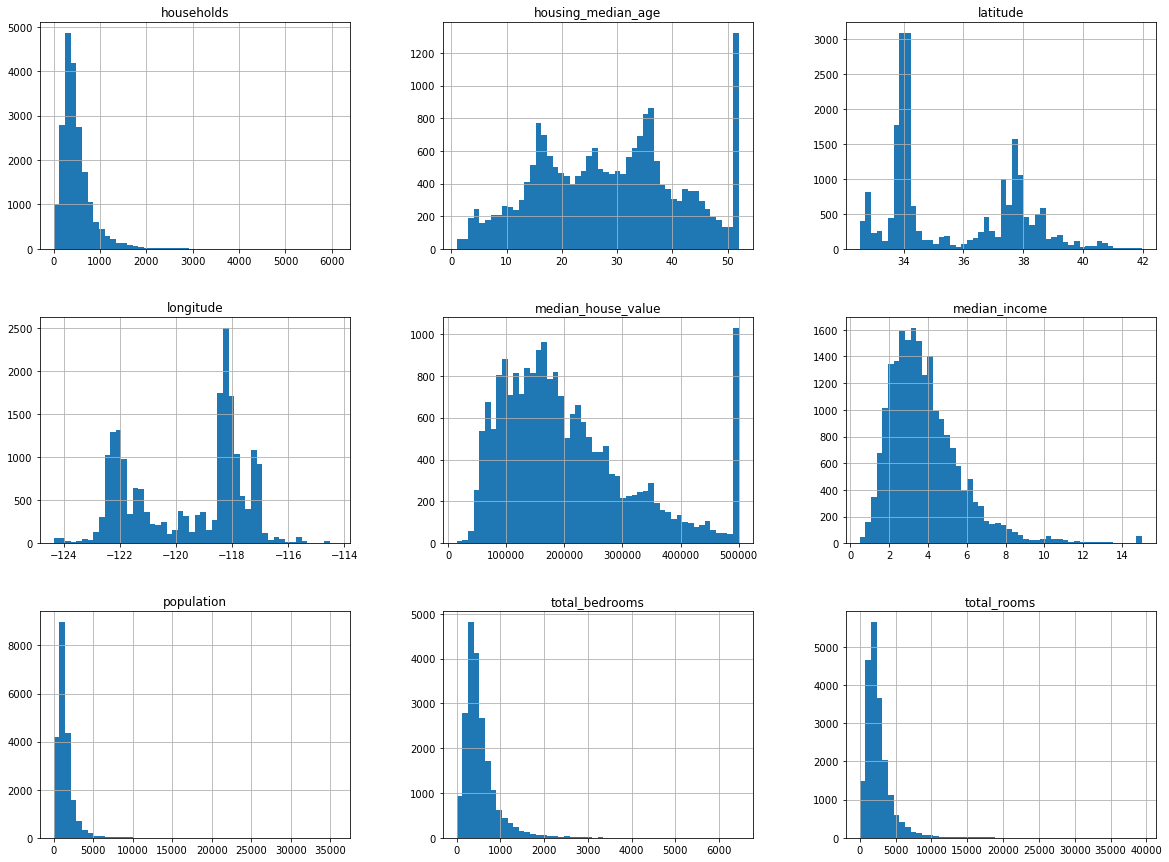

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

    hist () 메서드는 사용자 지정 그래픽 백엔드를 사용하여 화면에 그리는 Matplotlib을 사용합니다. 따라서 어떤 것을 플롯하기 전에 Matplotlib에서 사용해야하는 백엔드를 지정해야합니다. 가장 간단한 옵션은 Jupyter의 명령 % matplotlib inline을 사용하는 것입니다. 이것은 Jupyter에게 Jupyter의 자체 백엔드를 사용하도록 Matplotlib을 설정하도록 지시합니다. 그러면 플롯이 노트 자체 내에서 렌더링됩니다. Jupyter 노트북은 셀이 실행될 때 자동으로 플롯을 표시하므로 show () 호출은 선택 사항입니다.

이 히스토그램에서 몇가지 특성을 뽑아낼 수 있습니다.

- 첫째, 중간 소득 특성은 미화 (USD)로 표현 된 것처럼 보이지 않습니다. 데이터를 수집 한 팀과 확인한 결과, 데이터의 규모가 조정되어 중위 소득이 높은 경우 15 (실제로는 15.0001), 중간 중간 소득이 낮은 경우에는 0.5 (실제로는 0.4999)로 제한됩니다. 전처리 된 속성으로 작업하는 것은 기계 학습에서 일반적이며, 반드시 문제는 아니지만 데이터 계산 방법을 이해해야합니다.

2. 주택의 평균 연령과 중앙값 또한 제한되어 있습니다. 후자는 타겟 속성 (레이블)이므로 심각한 문제 일 수 있습니다. 귀하의 기계 학습 알고리즘은 가격이 그 한도를 초과하지 않는다는 것을 알 수 있습니다. 이것이 문제가되는지 여부를 확인하려면 클라이언트 팀 (시스템 출력을 사용할 팀)에 문의해야합니다. 그들이 $ 500,000 이상으로 정확한 예측이 필요하다고 말하면 주로 다음 두 가지 옵션이 있습니다.

        a. 적합한 라벨을 수집하십시오.
        b. 훈련 세트 (및 테스트 세트)에서 해당 지역을 제거하십시오. 시스템이 $ 500,000 이상의 값을 예측하면 시스템을 잘못 평가해서는 안되기 때문입니다.


- 이러한 속성은 매우 다른 스케일을 가집니다. 이 장의 뒷부분에서 설명하겠습니다.

- 마지막으로, 많은 히스토그램은 꼬리가 무겁습니다 : 그들은 왼쪽보다 훨씬 중앙에서 오른쪽으로 확장됩니다. 이렇게하면 일부 기계 학습 알고리즘이 패턴을 감지하는 것이 더 어려워 질 수 있습니다. 나중에 더 많은 종 모양의 분포를 갖기 위해 이러한 속성을 변환하려고 시도 할 것입니다.

### Create a Test Set

이 단계에서 자발적으로 데이터의 일부를 따로 설정하는 것이 이상하게 들릴 수 있습니다. 결국 데이터를 한눈에 살펴 보았을 뿐 입니다. 알고리즘을 결정하기 전에 많은 것을 배워야 하는 것도 맞습니다. 하지만 우리의 뇌는 너무 패턴을 잘 발견해 오버피팅이 될 수 있습니다. 즉, 테스트 세트를 보면 테스트 데이터에서 겉으로 보기에는 흥미로운 패턴을 발견해 특정 종류의 기계 학습 모델을 사용하게 할 수 있습니다. 테스트 세트를 사용하여 일반화 오류를 추정 할 때 예상치가 너무 낙관적일 수 있어 잘 맞지 않는 모델을 만들 수 있습니다. 이를 _data snooping bias_라고합니다.

테스트 세트를 생성하는 것은 이론상 매우 간단합니다. 즉, 데이터 세트의 20 %를 무작위로 선택하여 따로 설정하면됩니다.

In [14]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


이는 작동하지만 완벽하지 않습니다: 프로그램을 다시 실행하면 다른 테스트 세트가 생성됩니다! 시간이 지남에 따라 귀하 (또는 귀하의 기계 학습 알고리즘)가 피해야 할 전체 데이터 세트를 볼 수 있습니다.

한 가지 해결책은 첫 번째 실행시 테스트 세트를 저장 한 다음 후속 실행에서 테스트 세트를 로드하는 것입니다. 또 다른 옵션은 `np.random.permutation()`을 호출하기 전에 난수 생성기의 시드 (예 : np.ran dom.seed (42))를 설정하여 항상 동일한 동일한 순서대로 생성되는 인덱스를 생성하는 것입니다.

그러나 이 두 가지 솔루션은 다음에 업데이트 된 데이터 세트를 가져 오는 동안 중단됩니다. 일반적인 해결책은 각 인스턴스의 식별자를 사용하여 인스턴스가 고유하고 불변의 식별자를 가지고 있다고 가정 할 때 테스트 세트에 있어야하는지 여부를 결정하는 것입니다. 예를 들어 각 인스턴스 식별자의 해시를 계산하고 해시의 마지막 바이트만 유지한 다음 이 값이 51보다 작거나 같으면 (256의 ~ 20 %) 인스턴스를 테스트 세트에 넣을 수 있습니다. 이렇게하면 데이터 세트를 새로 고치더라도 테스트 세트가 여러 번 실행되는 동안 일관되게 유지됩니다. 새 테스트 세트에는 새 인스턴스의 20 %가 포함되지만 이전에 교육 세트에 있었던 인스턴스는 포함되지 않습니다. 가능한 구현은 다음과 같습니다.

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

유감스럽게도 주택 데이터 세트에는 식별자 열이 없습니다. 가장 간단한 해결책은 행 인덱스를 ID로 사용하는 것입니다.

In [58]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [59]:
hash("yoyo")

-1867487063759003943

In [60]:
m = hashlib.md5()
st = "Woojin"
m.update(st.encode("utf-8"))
print(m.digest())
print(hash(m))

b'\xb3V<\xe6\x8a\xb4\xad"\x97\xe88n\x9cV\xf7\xbf'
286539076


고유한 식별자로 행 인덱스를 사용하는 경우 새 데이터가 데이터 집합 끝에 추가되고 행이 삭제되지 않도록 해야 합니다. 이것이 가능하지 않으면 가장 안정된 기능을 사용하여 고유 한 식별자를 만들 수 있습니다. 예를 들어, 한 지구의 위도와 경도는 수백만 년 동안 안정적인 것으로 보장되므로 다음과 같이 ID에 결합 할 수 있습니다.

In [61]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn은 다양한 방식으로 데이터 세트를 여러 하위 세트로 분할하는 몇 가지 기능을 제공합니다. 가장 간단한 함수는 `train_test_split`입니다.이 함수는 몇 가지 추가 기능을 사용하여 앞에서 정의한 `split_train_test` 함수와 거의 같습니다. 먼저 random_state 매개 변수를 사용하여 앞에서 설명한 임의 생성기 시드를 설정할 수 있으며 두 번째로 동일한 수의 행을 가진 여러 데이터 집합을 전달할 수 있으며 동일한 인덱스에서 이를 분리합니다 (이는 매우 유용합니다. 예를 들어 라벨용으로 별도의 DataFrame이있는 경우)

In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

   지금까지는 순전히 무작위 샘플링 방법을 고려했습니다. 데이터 집합이 충분히 (특히 속성 수에 비례하여) 큰 경우 일반적으로 좋지만 그렇지 않은 경우 상당한 샘플링 편향을 유발할 위험이 있습니다. 설문 조사 회사가 1,000 명에게 전화하여 몇 가지 질문을 하기로 결정하면 전화 부스에서 무작위로 1,000 명을 선택하지 않습니다. 최대한 1000명이 모든 인구를 대표하도록 뽑으려고 노력합니다. 예를 들어, 미국 인구는 여성 51.3 %와 남성 48.7 %로 구성되어 있으므로 미국에서 잘 수행 된 설문 조사는 표본에서 513 명의 여성과 487 명의 남성이 비율을 유지하려고 시도합니다. 이를 _stratified sampling_샘플링 이라고 합니다. 인구는 _strata_이라고하는 균질 하위 그룹으로 나누어지고 테스트 세트가 전체 인구를 대표한다는 것을 보장하기 위해 적절한 수의 인스턴스가 각 계층에서 샘플링됩니다. 순수 무작위 표본 추출을 사용하는 경우 49 % 미만의 여성 또는 54 % 이상의 여성이있는 비뚤어진 테스트 세트를 샘플링 할 확률은 약 12%입니다. 어느 쪽이든, 설문 조사 결과는 상당히 편파적입니다.

중간 소득이 주택 가격의 중앙값을 예측하는 데 매우 중요한 속성이라고 말한 전문가와 이야기했다고 가정 해 봅시다. 테스트 세트가 전체 데이터 세트의 다양한 소득 카테고리를 대표하도록 만들고 싶습니다. 중간 소득은 연속적인 숫자 속성이므로 먼저 소득 카테고리 속성을 만들어야합니다. 중간 소득에 대한 히스토그램을보다 자세히 살펴 봅시다 (그림 2-9 참조).

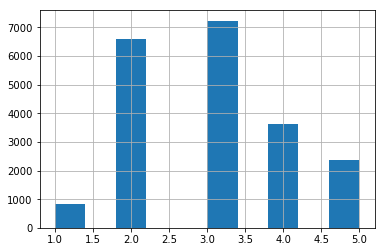

In [64]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()

대부분의 중위 소득 값은 2 ~ 5 (수만 달러) 정도이지만, 일부 중앙값은 6을 훨씬 초과합니다. 각 계층에 대해 데이터 집합에 충분한 수의 인스턴스를 갖는 것이 중요합니다. 아니라면 계층의 중요성이 편향 될 수 있습니다. 이는 너무 많은 계층들을 가져서는 안되며 각 계층이 충분히 커야 함을 의미합니다. 위의(히스토그램 위) 코드는 중간 소득을 1.5로 나누고 (소득 카테고리 수를 제한하기 위해) ceil을 사용하여 반올림 한 다음 (카테고리를 분리하기 위해) 5보다 큰 모든 카테고리를 카테고리 5에 병합하여 소득 카테고리 속성을 만듭니다.

이제 소득 카테고리를 기반으로 계층화 된 샘플링을 수행 할 준비가 되었습니다. 이를 위해 Scikit-Learn의 `StratifiedShuffleSplit` 클래스를 사용할 수 있습니다.

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

이것이 예상대로 작동하는지 봅시다. 전체 주택 데이터 세트에서 소득 카테고리 비율을 보면 시작할 수 있습니다.

In [69]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

비슷한 코드를 사용하여 테스트 세트에서 소득 카테고리 비율을 측정 할 수 있습니다. 그림 2-10은 전체 데이터 세트, 계층화 된 샘플링으로 생성 된 테스트 세트 및 순전히 무작위 샘플링을 사용하여 생성 된 테스트 세트의 소득 카테고리 비율을 비교합니다. 보시다시피, 계층화 샘플링을 사용하여 생성 된 테스트 세트는 전체 데이터 세트의 소득 카테고리 비율과 거의 동일하지만 순전히 무작위 샘플링을 사용하여 생성 된 테스트 세트는 상당히 왜곡되어 있습니다.

In [70]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [71]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


이제 데이터가 원래 상태로 되돌아 가도록 `income_cat` 속성을 제거해야합니다.

In [72]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

우리는 때문에 테스트 세트 생성에 많은 시간을 보냈습니다. 이것은 종종 Machine Learning 프로젝트에서 무시 당했지만 중요한 부분이었습니다. 게다가 이러한 아이디어 중 상당수는 교차 검증에 대해 나중에 논의 할 때 유용 할 것입니다. 이제 다음 단계로 넘어갈 때입니다. 데이터 탐색입니다.

## Discover and Visualize the Data to Gain Insights

지금까지 조작 한 데이터의 종류에 대해 전반적으로 이해하기 위해 데이터를 간략하게 살펴 보았습니다. 이제 목표는 조금 더 깊이 들어가는 것입니다.

먼저, 테스트 세트를 옆에 두었고 트레이닝 세트 만 탐색하고 있는지 확인하십시오. 또한 훈련 세트가 매우 큰 경우 조작을 쉽고 빠르게 수행하기 위해 탐색 세트를 샘플링 할 수 있습니다. 우리의 경우 세트가 아주 작아서 풀 세트에서 직접 작업 할 수 있습니다. 트레이닝셋을 건드리지 않으면서 작업을 할 수 수 있도록 사본을 만들어 봅시다.

In [73]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

지리 정보 (위도와 경도)가 있기 때문에 모든 지구의 산점도를 작성하여 데이터를 시각화하는 것이 좋습니다

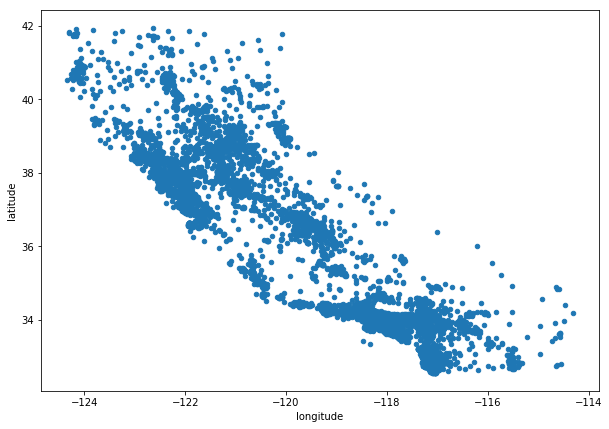

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(10,7))

이것은 캘리포니아처럼 보이지만 그 외의 특정 패턴을 보기는 어렵습니다. 알파 옵션을 0.1로 설정하면 높은 밀도의 데이터 포인트가 있는 장소를 훨씬 쉽게 시각화 할 수 있습니다 (그림 2-12).

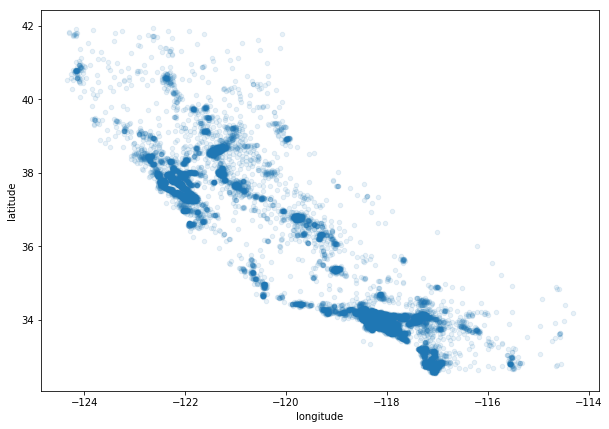

In [78]:
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(10,7), alpha=0.1)

이제는 훨씬 나아졌습니다 : 베이 지역, 로스 앤젤레스 및 샌디에고 주변의 고밀도 지역과 센트럴 밸리, 특히 새크라멘토 (Sacramento) 및 프레스노 (Fresno) 주변의 긴밀한 밀도의 높은 라인을 명확하게 볼 수 있습니다.

보다 일반적으로 우리의 두뇌는 그림에 패턴을 적용하는 데 매우 뛰어나지만 패턴을 돋보이게하려면 시각화 매개 변수를 사용해야합니다.

이제 주택 가격을 살펴 봅시다 (그림 2-13). 각 원의 반지름은 해당 지역의 인구 (옵션 s)를 나타내며 색상은 가격을 나타냅니다 (옵션 c). Jet (파란색) (낮은 값)에서 빨간색 (높은 가격) 범위의 미리 정의 된 색상 맵 (옵션 cmap)을 사용합니다.

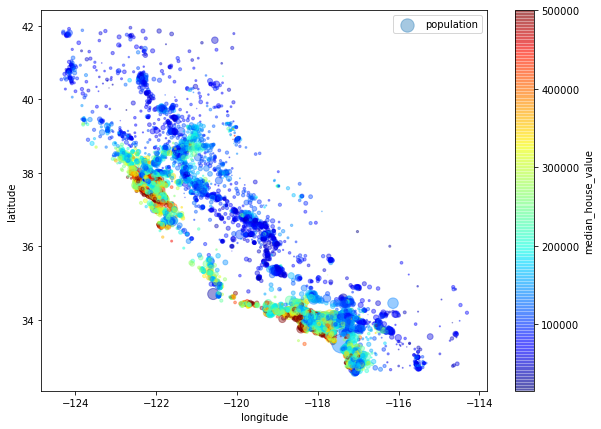

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

이 이미지는 주택 가격이 이미 알고있는 것처럼 위치 (예 : 바다와 가까운 곳)와 인구 밀도와 매우 관련이 있음을 나타냅니다. 아마도 클러스터링 알고리즘을 사용하여 주요 클러스터를 탐지하고 클러스터 센터의 근접성을 측정하는 새로운 기능을 추가하는 것이 유용 할 것입니다. 해양 근접 속성이 유용 할 수 있지만, 북부 캘리포니아에서는 연안 지역의 주택 가격이 너무 높지 않기 때문에  간단한 규칙은 아닙니다.